In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 2000)

This analysis based off of the analysis done here: https://sjpeterson.medium.com/transportation-lifestyles-lessons-for-the-future-from-2006-2019-2c4dc0851db4

She establishes these 4 categories:
- car-free households, 
- car-lite (or car-one) families, 
- singles with only one vehicle, 
- car-two+ households

"Car-lite households are families with only one vehicle. Singles with only one vehicle are part of the larger “car-oriented” category along with car-two+ households, defined as all households — singles and families — with two-or-more vehicles."

So you can group these 4 categories into 3 actually:
- car-free
- car-lite
- car-oriented

### Some things the author notes about policy
- Data dating back to 2006, however, allows a review of transportation lifestyles during and after the Great Recession. Although families with only one car have been on a precipitous decline of late, policy makers should pay close attention to this lifestyle type. We may be about to see a lot more of them. What types of transportation and neighborhood services support this lifestyle?
- Policy makers should also recognize the special vulnerability of households — whether families or singles — with only one car. An economic or health catastrophe can leave them car-free in a car-oriented world.
-  I use car-free because it puts up front what these households have: they are free from the costs of owning, maintaining, and parking a vehicle. However, the car-free status should not be romanticized. For certain people in certain places, it works well. In the vast majority of the United States, car-free living is the equivalent of an extreme sport. The “athlete” may be the mother taking three buses to get between home, day care, and her job. The “team” may be the group of family, friends, and home care workers driving daily to help keep an elderly person who no longer drives in their own home.
- 


In [34]:
def linechart(df, x_dim, y_dim, xaxis, yaxis, title):
    
    fig, ax = plt.subplots(figsize=(15, 7))
    if x_dim == 'index':
        df[y_dim].plot(ax=ax, grid=True)
    else:
        df.set_index(x_dim)[y_dim].plot(ax=ax, grid=True)

    #adds a title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xaxis)
    ax.set_ylabel(yaxis)
    
    #removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.show()
    
def get_indexed_value(df,row,col):
    msa = row['NAME']
    msa_df = df.loc[df['NAME'] == msa]
    start_val = msa_df.loc[msa_df['year'] == msa_df['year'].min()][col].values[0]
    return (row[col]/start_val)*100

def print_select_linechart(msa_name,var_list):
    single_msa = hhsize_data.loc[hhsize_data['NAME'] == msa_name].sort_values('year',ascending=True)
    linechart(single_msa, 'year', var_list, 'year', 'total households', 'Household growth in '+msa_name)

# Household size by vehicle available

In [35]:
hhsize_dir = '../data/productDownload_2020-12-08T141048/'
hhsize_meta = pd.read_csv('../data/productDownload_2020-12-08T141048/ACSDT1Y2010.B08201_metadata_2020-12-08T141032.csv')
#hhsize_data = pd.read_csv('../data/productDownload_2020-12-08T141048/ACSDT1Y2010.B08201_data_with_overlays_2020-12-08T141032.csv')

li = []
for file in glob.glob(hhsize_dir+'ACSDT1Y'+'*.B08201_data_with_overlays_2020-12-08T141032.csv'):
    print('Working on',file)
    start_len = len(hhsize_dir+'ACSDT1Y')
    year = file[start_len:start_len+4]
    df = pd.read_csv(file, skiprows=[1])
    df['year'] = int(year)
    li.append(df)
    
hhsize_full = pd.concat(li, axis=0, ignore_index=True)

#msa10 = hhsize_full['NAME'].isin(list(hhsize_full.loc[hhsize_full['year'] == 2010]['NAME'].unique()))
#msa11 = hhsize_full['NAME'].isin(list(hhsize_full.loc[hhsize_full['year'] == 2011]['NAME'].unique()))
#msa12 = hhsize_full['NAME'].isin(list(hhsize_full.loc[hhsize_full['year'] == 2012]['NAME'].unique()))
#msa13 = hhsize_full['NAME'].isin(list(hhsize_full.loc[hhsize_full['year'] == 2013]['NAME'].unique()))
#msa14 = hhsize_full['NAME'].isin(list(hhsize_full.loc[hhsize_full['year'] == 2014]['NAME'].unique()))
#msa15 = hhsize_full['NAME'].isin(list(hhsize_full.loc[hhsize_full['year'] == 2015]['NAME'].unique()))
#msa16 = hhsize_full['NAME'].isin(list(hhsize_full.loc[hhsize_full['year'] == 2016]['NAME'].unique()))
#msa17 = hhsize_full['NAME'].isin(list(hhsize_full.loc[hhsize_full['year'] == 2017]['NAME'].unique()))
#msa18 = hhsize_full['NAME'].isin(list(hhsize_full.loc[hhsize_full['year'] == 2018]['NAME'].unique()))
#msa19 = hhsize_full['NAME'].isin(list(hhsize_full.loc[hhsize_full['year'] == 2019]['NAME'].unique()))
#
#hhsize_data = hhsize_full.loc[(msa10)&(msa11)&(msa12)&(msa13)&(msa14)&(msa15)&(msa16)&(msa17)&(msa18)&(msa19)]
print('')
print('Unique MSAs included:',len(hhsize_full.NAME.unique()))

Working on ../data/productDownload_2020-12-08T141048/ACSDT1Y2019.B08201_data_with_overlays_2020-12-08T141032.csv
Working on ../data/productDownload_2020-12-08T141048/ACSDT1Y2018.B08201_data_with_overlays_2020-12-08T141032.csv
Working on ../data/productDownload_2020-12-08T141048/ACSDT1Y2010.B08201_data_with_overlays_2020-12-08T141032.csv
Working on ../data/productDownload_2020-12-08T141048/ACSDT1Y2014.B08201_data_with_overlays_2020-12-08T141032.csv
Working on ../data/productDownload_2020-12-08T141048/ACSDT1Y2015.B08201_data_with_overlays_2020-12-08T141032.csv
Working on ../data/productDownload_2020-12-08T141048/ACSDT1Y2011.B08201_data_with_overlays_2020-12-08T141032.csv
Working on ../data/productDownload_2020-12-08T141048/ACSDT1Y2016.B08201_data_with_overlays_2020-12-08T141032.csv
Working on ../data/productDownload_2020-12-08T141048/ACSDT1Y2012.B08201_data_with_overlays_2020-12-08T141032.csv
Working on ../data/productDownload_2020-12-08T141048/ACSDT1Y2013.B08201_data_with_overlays_2020-

**B08201_001E** = Total households

**B08201_002E** = Households with no vehicle available (car free)

**B08201_003E** = Households with 1 vehicle available (undetermined classification)

**B08201_004E** = Households with 2 vechicles available (car-oriented)

**B08201_005E** = Households with 3 vechicles available (car-oriented)

**B08201_006E** = Households with 4+ vechicles available (car-oriented)

\*Need to combine B08201_004E + B08201_005E + B08201_006E for "car-oriented living" category


**B08201_007E** = 1-person households

**B08201_008E** = 1-person households, no vehicle (car-free)

**B08201_009E** = 1-person households, 1 vehicle (car-oriented)

**B08201_010E** = 1-person households, 2 vehicle (car-oriented)

**B08201_011E** = 1-person households, 3 vehicle (car-oriented)

**B08201_012E** = 1-person households, 4+ vehicle (car-oriented)

\*Need to combine B08201_010E + B08201_011E + B08201_012E for "car-oriented living" category


**B08201_013E + B08201_019E + B08201_025E** = 2+ family households

**B08201_014E + B08201_020E + B08201_026E** = 2+ family households, no vehicle (car-free)

**B08201_015E + B08201_021E + B08201_027E** = 2+ family households, 1 vehicle (car-lite)

**(B08201_016E + B08201_017E + B08201_018E) + (B08201_022E + B08201_023E + B08201_024E) + (B08201_028E + B08201_029E + B08201_030E)** = 2+ family household, 2+ vehicles (car-oriented)

In [36]:
hhsize_data = hhsize_full

rename_cols = {'B08201_001E':'total_hh','B08201_002E':'total_hh_carfree','B08201_003E':'total_hh_one',
              'B08201_007E':'single_hh','B08201_008E':'single_hh_carfree','B08201_009E':'single_hh_one'}

hhsize_data['total_hh_2more'] = hhsize_data['B08201_004E'] + hhsize_data['B08201_005E'] + hhsize_data['B08201_006E']
hhsize_data['single_hh_2more'] = hhsize_data['B08201_010E'] + hhsize_data['B08201_011E'] + hhsize_data['B08201_012E']
hhsize_data['multi_hh'] = hhsize_data['B08201_013E'] + hhsize_data['B08201_019E'] + hhsize_data['B08201_025E']
hhsize_data['multi_hh_carfree'] = hhsize_data['B08201_014E'] + hhsize_data['B08201_020E'] + hhsize_data['B08201_026E']
hhsize_data['multi_hh_one'] = hhsize_data['B08201_015E'] + hhsize_data['B08201_021E'] + hhsize_data['B08201_027E']
hhsize_data['multi_hh_2more'] = (hhsize_data['B08201_016E'] + hhsize_data['B08201_017E'] + hhsize_data['B08201_018E']) + \
                                (hhsize_data['B08201_022E'] + hhsize_data['B08201_023E'] + hhsize_data['B08201_024E']) + \
                                (hhsize_data['B08201_028E'] + hhsize_data['B08201_029E'] + hhsize_data['B08201_030E'])

hhsize_data.rename(columns=rename_cols, inplace=True)

keep_cols = ['GEO_ID','NAME','year',
             'total_hh','total_hh_carfree','total_hh_one','total_hh_2more',
             'single_hh','single_hh_carfree','single_hh_one','single_hh_2more',
            'multi_hh','multi_hh_carfree','multi_hh_one','multi_hh_2more']

hhsize_data = hhsize_data[keep_cols]
hhsize_data = hhsize_data.loc[hhsize_data['NAME'].str.contains('Metro Area')]

hhsize_data['car_free'] = hhsize_data['total_hh_carfree'] + hhsize_data['single_hh_carfree'] + hhsize_data['multi_hh_carfree']
hhsize_data['car_one_families'] = hhsize_data['multi_hh_one']#this is car-lite
hhsize_data['car_one_singles'] = hhsize_data['single_hh_one']
hhsize_data['car_two_plus'] = hhsize_data['single_hh_2more'] + hhsize_data['multi_hh_2more']
hhsize_data['car_oriented'] = hhsize_data['single_hh_one'] + hhsize_data['single_hh_2more'] + hhsize_data['multi_hh_2more']

hhsize_data['total_hh_indexed'] = hhsize_data.apply(lambda x: get_indexed_value(hhsize_data,x,'total_hh'), axis=1)
hhsize_data['car_free_i'] = hhsize_data.apply(lambda x: get_indexed_value(hhsize_data,x,'car_free'), axis=1)
hhsize_data['car_one_families_i'] = hhsize_data.apply(lambda x: get_indexed_value(hhsize_data,x,'car_one_families'), axis=1)
hhsize_data['car_one_singles_i'] = hhsize_data.apply(lambda x: get_indexed_value(hhsize_data,x,'car_one_singles'), axis=1)
hhsize_data['car_two_plus_i'] = hhsize_data.apply(lambda x: get_indexed_value(hhsize_data,x,'car_two_plus'), axis=1)
hhsize_data['car_oriented_i'] = hhsize_data.apply(lambda x: get_indexed_value(hhsize_data,x,'car_oriented'), axis=1)

hhsize_min = hhsize_data.sort_values(['NAME','year'])[['GEO_ID','NAME','year','total_hh_indexed','car_free_i','car_one_families_i','car_one_singles_i','car_two_plus_i']]

### Increases in families with only one car
Below are the MSAs where family households with a single vehicle or no vehicle have risen, and households with two+ vehicles have fallen since 2010.

In [37]:
hhsize_min_2019 = hhsize_min.loc[hhsize_min['year'] == 2019]
car_dep_decrease = hhsize_min_2019.loc[(hhsize_min_2019['car_one_families_i']>100)&(hhsize_min_2019['car_free_i']>100)&(hhsize_min_2019['car_two_plus_i']<100)]

print(len(car_dep_decrease))
display(car_dep_decrease.sort_values('car_one_families_i', ascending=False))

8


,GEO_ID,NAME,year,total_hh_indexed,car_free_i,car_one_families_i,car_one_singles_i,car_two_plus_i
203,310M500US26380,"Houma-Thibodaux, LA Metro Area",2019,104.786292,180.748130,133.425011,103.148567,91.631506
35,310M500US12620,"Bangor, ME Metro Area",2019,106.070034,100.237417,114.527027,128.847952,98.175321
63,310M500US15260,"Brunswick, GA Metro Area",2019,109.409742,153.611111,113.330110,137.112982,97.073029
495,310M500US48060,"Watertown-Fort Drum, NY Metro Area",2019,97.051759,126.454869,111.250165,94.774981,89.061376
115,310M500US19340,"Davenport-Moline-Rock Island, IA-IL Metro Area",2019,100.322812,122.200451,106.635488,102.296752,96.128619
52,310M500US14100,"Bloomsburg-Berwick, PA Metro Area",2019,99.299506,135.957643,105.834186,95.803866,95.448846
169,310M500US24140,"Goldsboro, NC Metro Area",2019,101.513851,119.462734,103.841209,97.474631,99.876152
153,310M500US22520,"Florence-Muscle Shoals, AL Metro Area",2019,99.880151,121.850900,101.946588,94.749216,99.171263


Same criteria, but instead of comparing just using one year (2019), we're taking an average of the last 3 years.

In [38]:
hhsize_min_3yr = hhsize_min.loc[hhsize_min['year'].isin([2017,2018,2019])].groupby('NAME').agg('mean').reset_index()
hhsize_min_3yr = hhsize_min_3yr[['NAME','total_hh_indexed', 'car_free_i', 'car_one_families_i',
                                 'car_one_singles_i', 'car_two_plus_i']]

car_dep_dcrs_3yr = hhsize_min_3yr.loc[(hhsize_min_3yr['car_one_families_i']>100)&(hhsize_min_3yr['car_free_i']>100)&(hhsize_min_3yr['car_two_plus_i']<100)]

print(len(car_dep_dcrs_3yr))
display(car_dep_dcrs_3yr.sort_values('car_one_families_i', ascending=False))

8


,NAME,total_hh_indexed,car_free_i,car_one_families_i,car_one_singles_i,car_two_plus_i
329,"Rome, GA Metro Area",100.130961,117.952468,121.669708,86.089317,97.910539
153,"Great Falls, MT Metro Area",102.582721,145.335403,109.719163,106.519208,96.425301
177,"Houma-Thibodaux, LA Metro Area",103.509130,167.747298,109.119037,121.477501,92.622354
71,"Champaign-Urbana, IL Metro Area",103.021491,116.208983,108.358834,103.894709,98.888889
30,"Bangor, ME Metro Area",102.866773,108.634061,106.574247,122.059099,95.791146
23,"Atlantic City-Hammonton, NJ Metro Area",98.763187,117.408101,103.603190,100.536390,93.082543
100,"Davenport-Moline-Rock Island, IA-IL Metro Area",99.111407,105.956696,100.724438,103.111453,96.760032
193,"Johnstown, PA Metro Area",95.429443,101.268920,100.514916,89.678942,95.376305


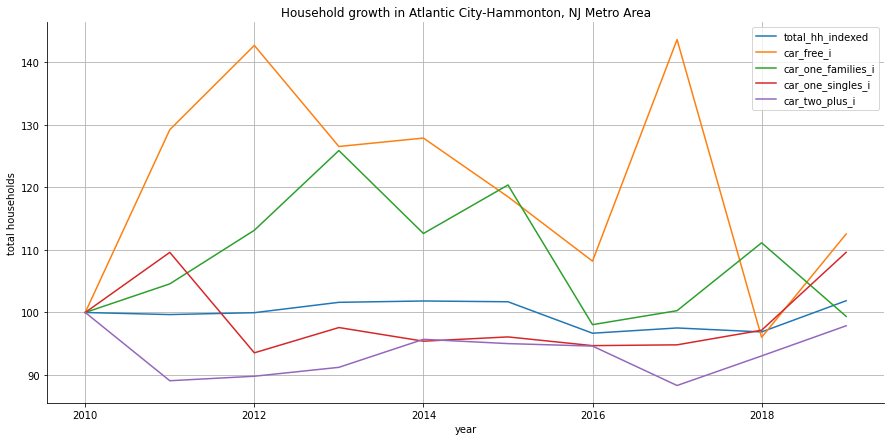

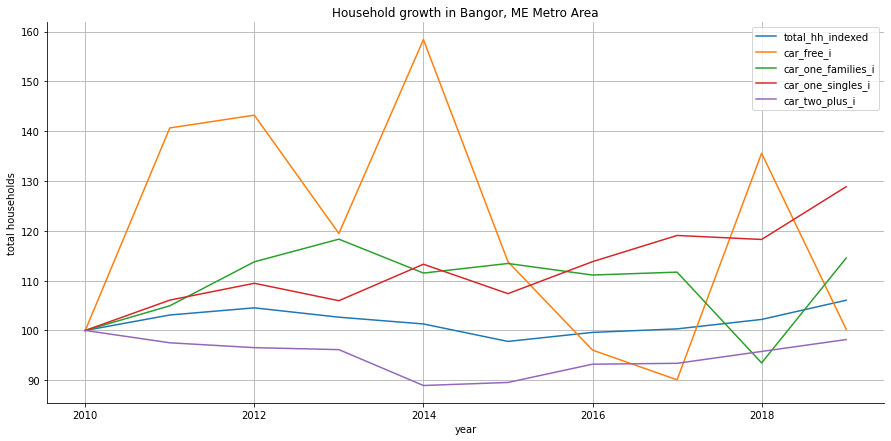

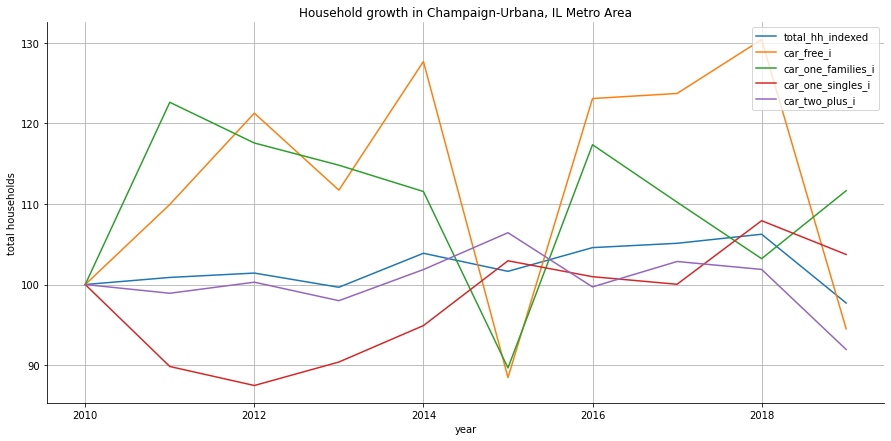

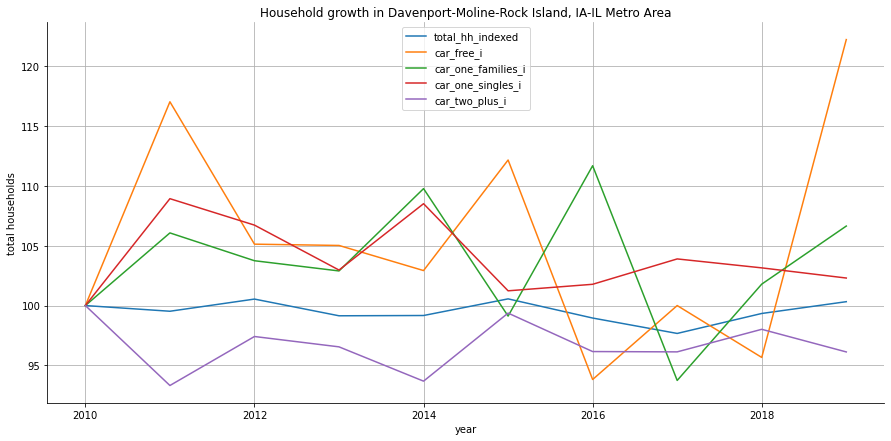

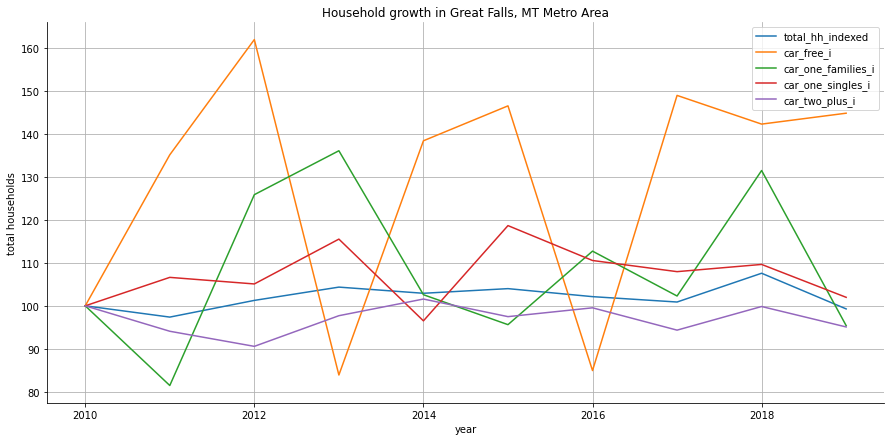

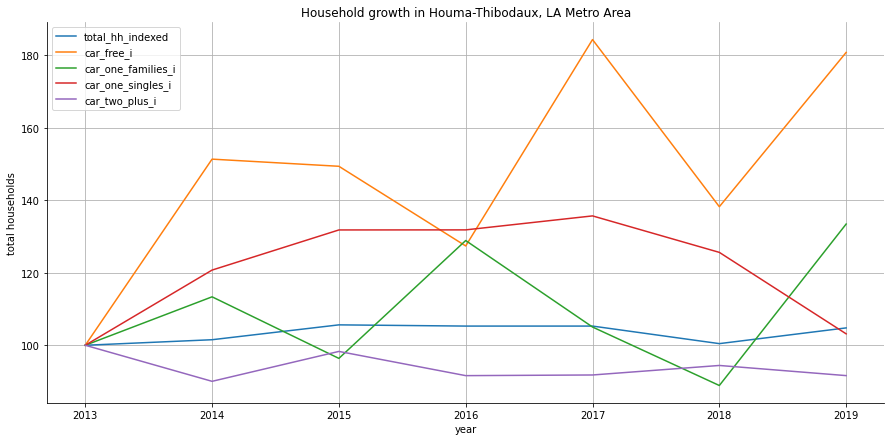

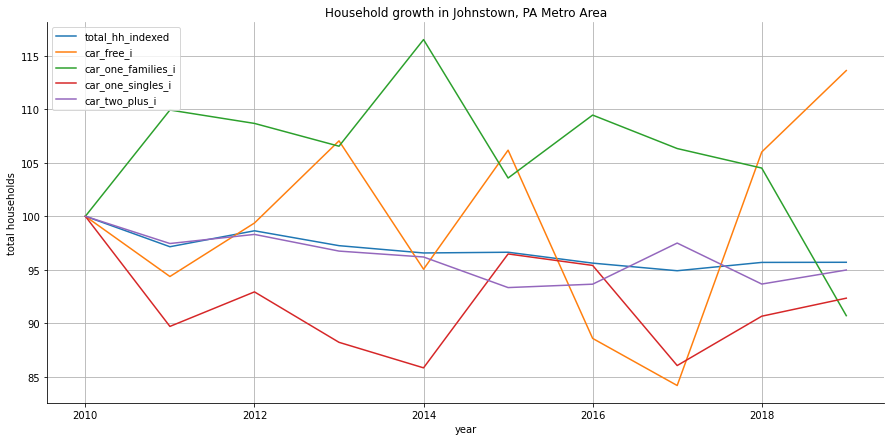

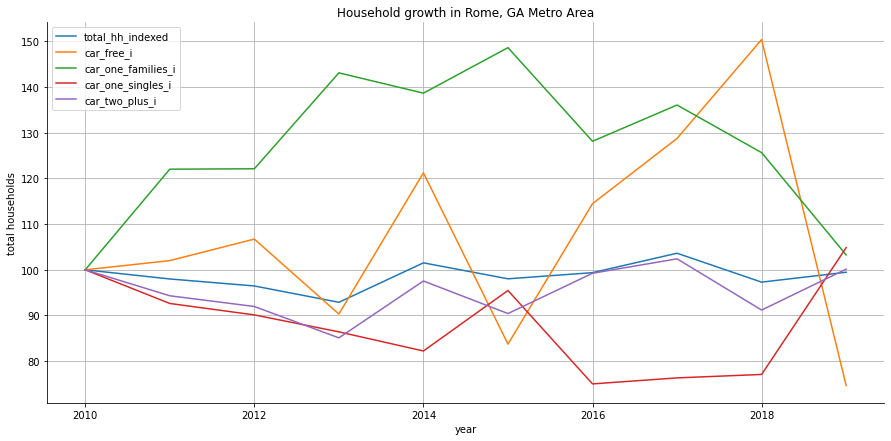

In [39]:
var_list = ['total_hh_indexed','car_free_i','car_one_families_i','car_one_singles_i','car_two_plus_i']

car_dep_dcrs_3yr_msa_list = list(car_dep_dcrs_3yr.NAME.unique())

for msa in car_dep_dcrs_3yr_msa_list:
    print_select_linechart(msa,var_list)

### Top 20 most populous MSAs
What do the top 20 most populous MSAs look like?

In [45]:
hhsize_min.loc[hhsize_min['NAME'].str.contains('Atlanta')].sort_values(['NAME','year'])

,GEO_ID,NAME,year,total_hh_indexed,car_free_i,car_one_families_i,car_one_singles_i,car_two_plus_i
26,310M500US12060,"Atlanta-Sandy Springs-Alpharetta, GA Metro Area",2019,100.000000,100.000000,100.000000,100.000000,100.000000
1063,310M100US12060,"Atlanta-Sandy Springs-Marietta, GA Metro Area",2010,100.000000,100.000000,100.000000,100.000000,100.000000
2678,310M100US12060,"Atlanta-Sandy Springs-Marietta, GA Metro Area",2011,100.883649,101.355756,105.581620,102.362700,99.171468
3667,310M100US12060,"Atlanta-Sandy Springs-Marietta, GA Metro Area",2012,102.354269,103.212552,107.179462,102.267617,101.063971
4195,310M200US12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",2013,100.000000,100.000000,100.000000,100.000000,100.000000
1587,310M200US12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",2014,101.386601,106.400221,96.312994,97.700253,103.451689
2097,310M200US12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",2015,103.804696,98.571045,95.664027,101.405386,107.384263
3148,310M300US12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",2016,105.549165,101.415137,93.507440,102.191356,110.391944
4711,310M300US12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",2017,107.562471,94.320759,94.246961,100.583463,114.933990
554,310M400US12060,"Atlanta-Sandy Springs-Roswell, GA Metro Area",2018,109.360257,99.010786,92.204047,103.060866,117.242591


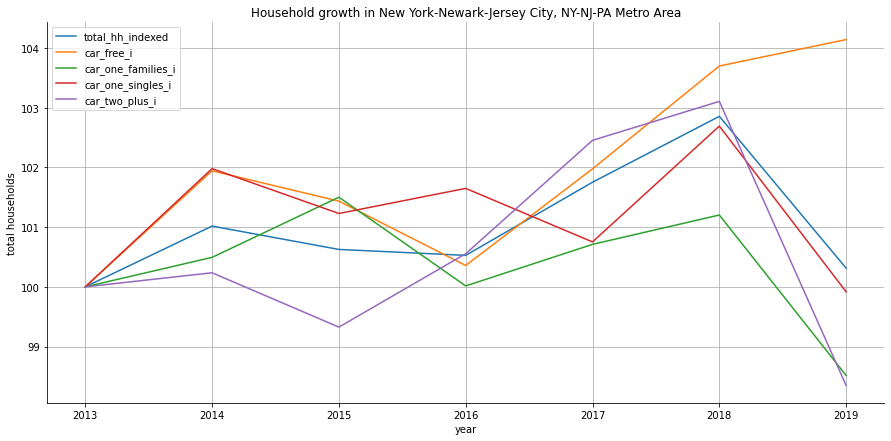

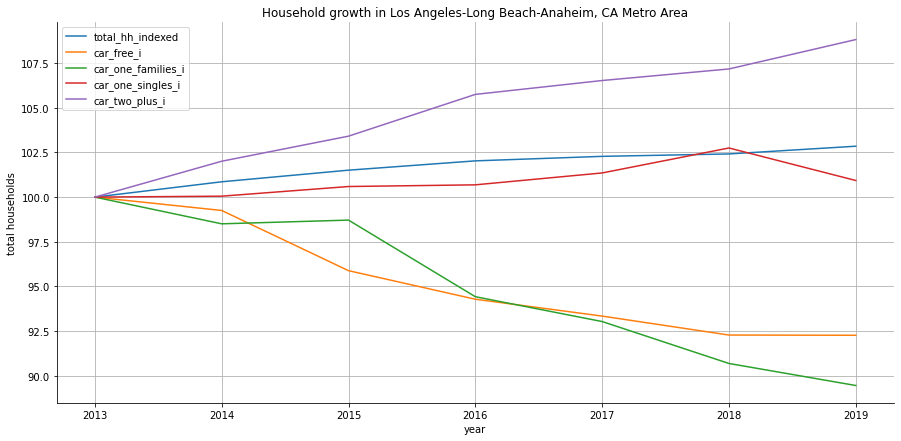

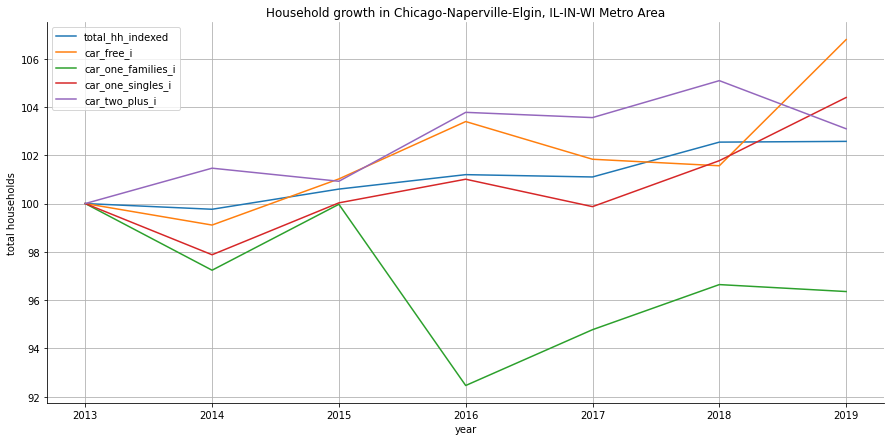

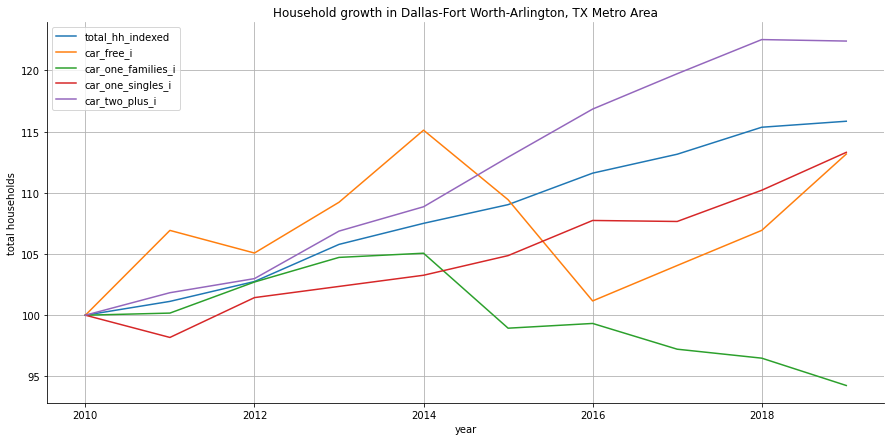

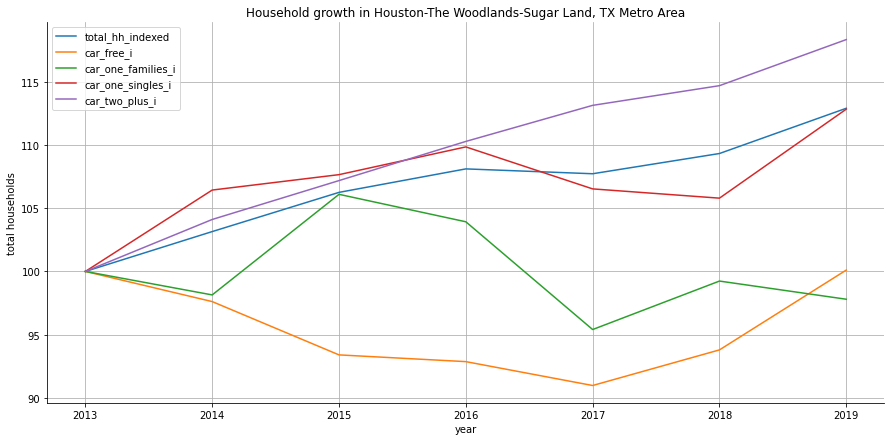

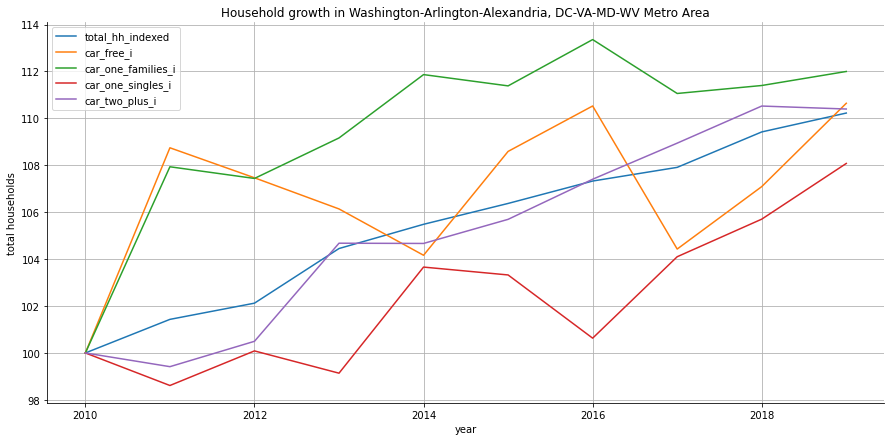

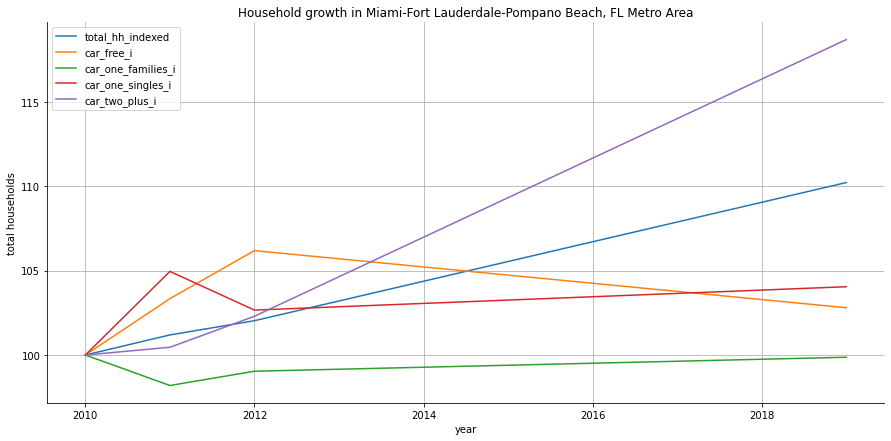

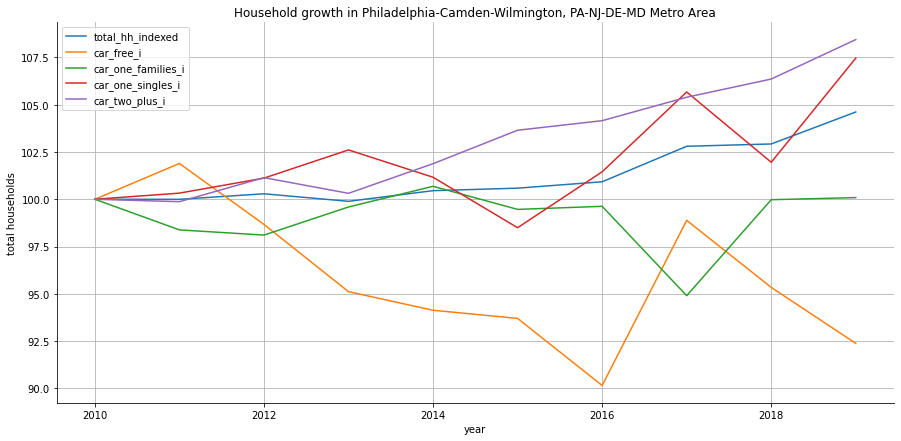

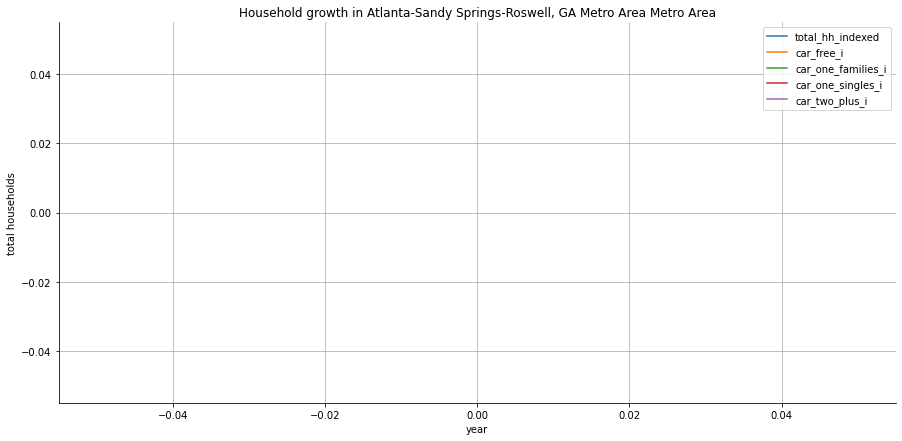

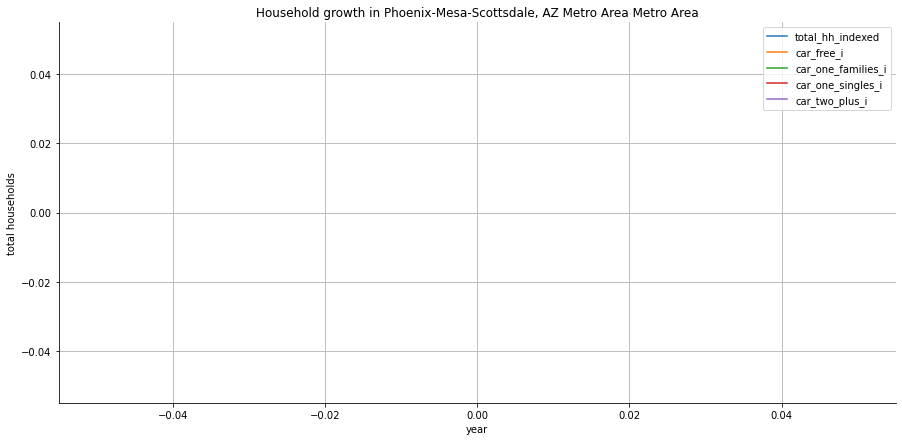

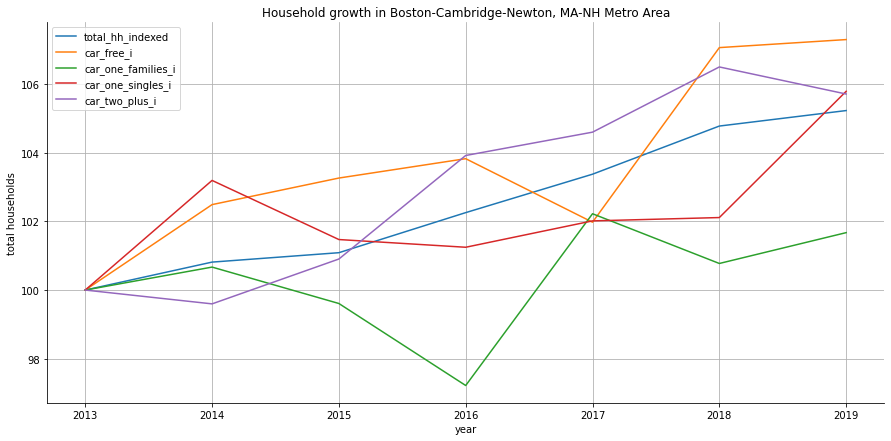

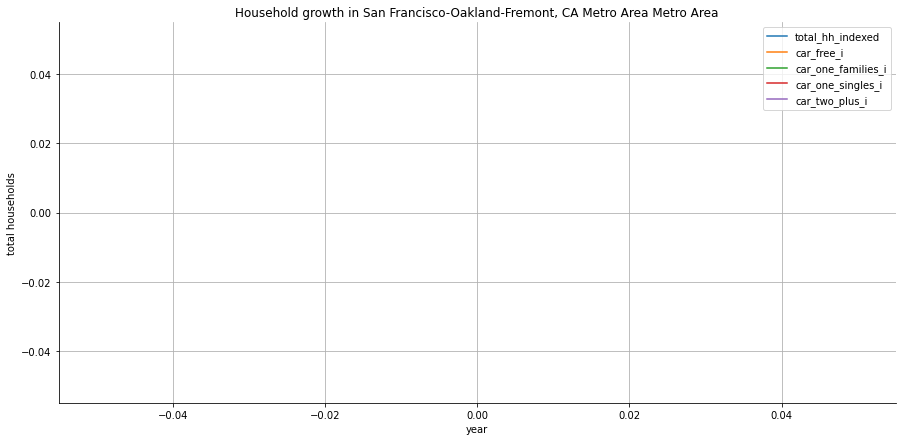

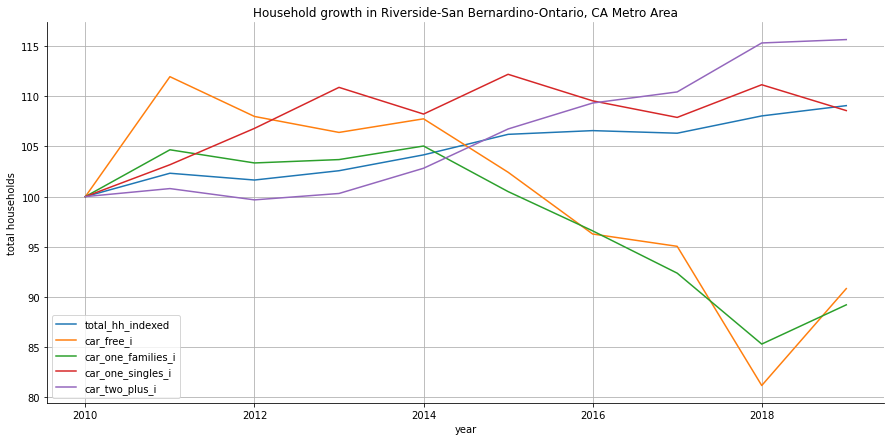

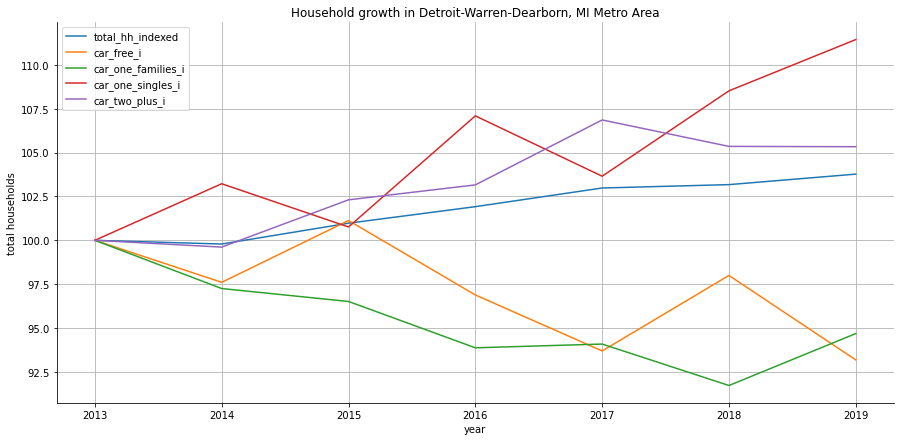

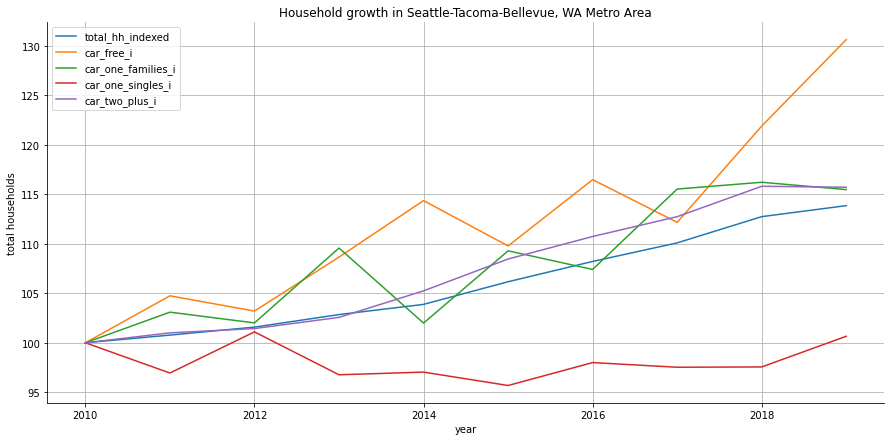

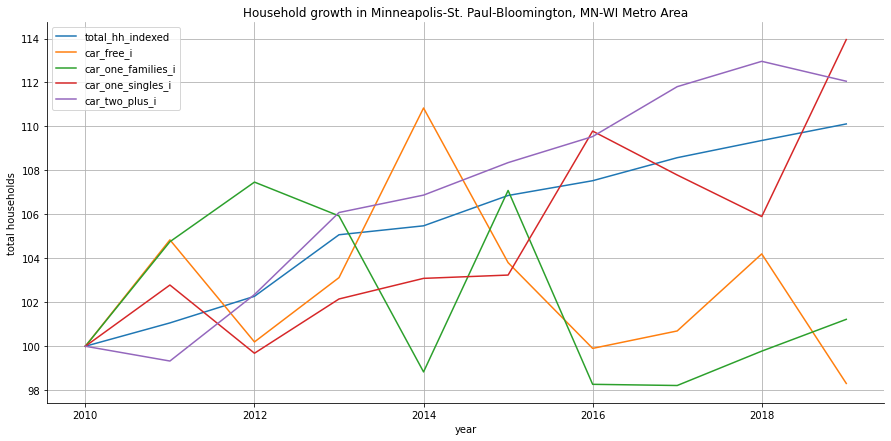

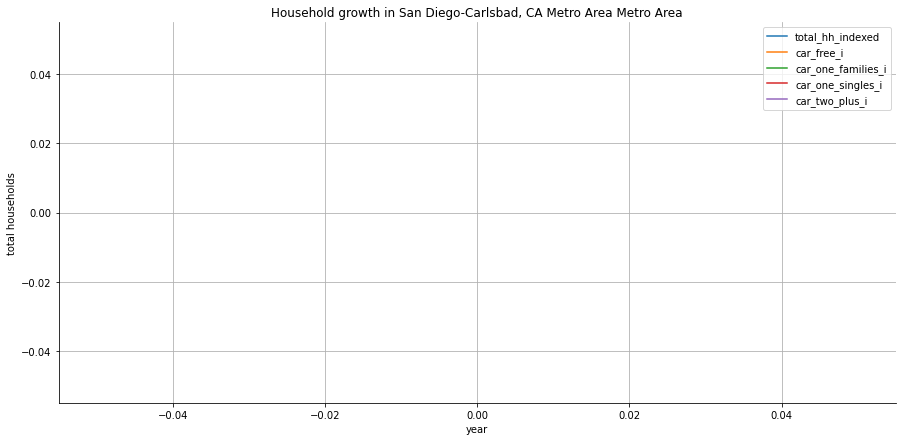

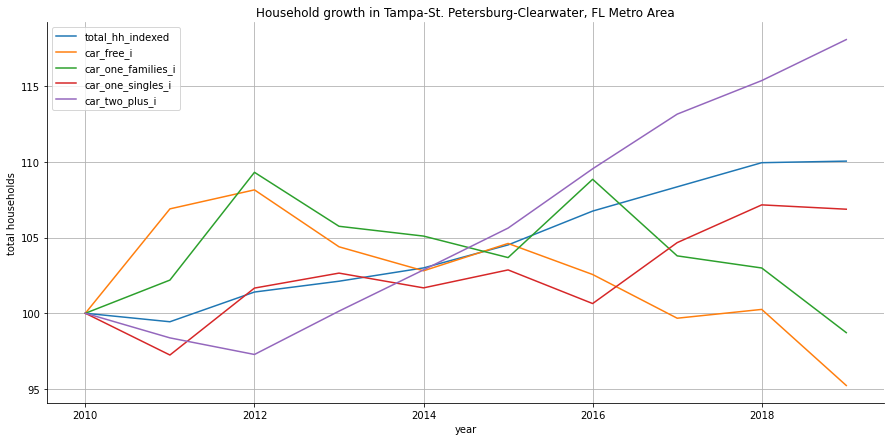

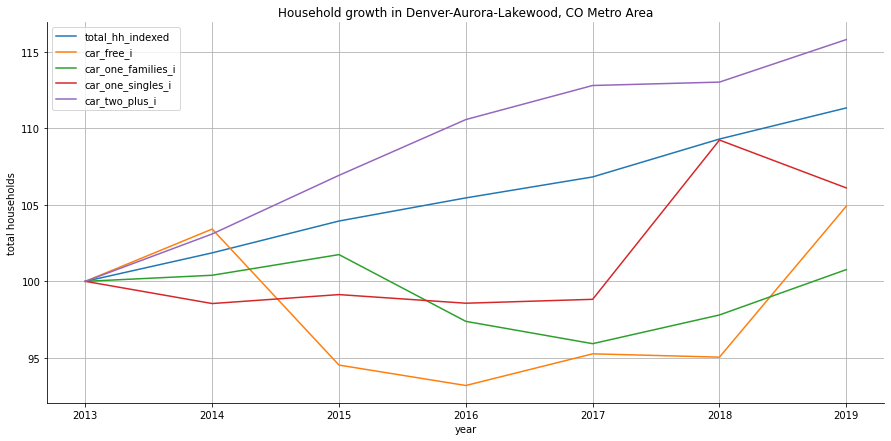

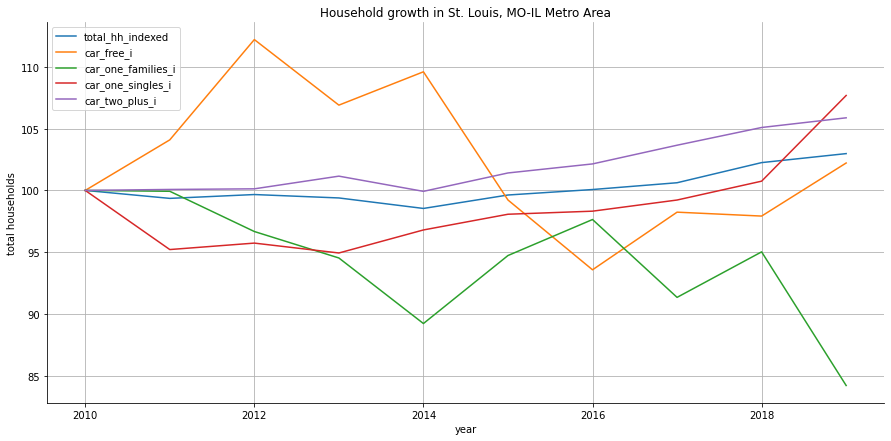

In [46]:
most_pop = ['New York-Newark-Jersey City, NY-NJ-PA',
             'Los Angeles-Long Beach-Anaheim, CA',
             'Chicago-Naperville-Elgin, IL-IN-WI',
             'Dallas-Fort Worth-Arlington, TX',
             'Houston-The Woodlands-Sugar Land, TX',
             'Washington-Arlington-Alexandria, DC-VA-MD-WV',
             'Miami-Fort Lauderdale-Pompano Beach, FL',
             'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD',
             'Atlanta-Sandy Springs-Roswell, GA Metro Area',
             'Phoenix-Mesa-Scottsdale, AZ Metro Area',
             'Boston-Cambridge-Newton, MA-NH',
             'San Francisco-Oakland-Fremont, CA Metro Area',
             'Riverside-San Bernardino-Ontario, CA',
             'Detroit-Warren-Dearborn, MI',
             'Seattle-Tacoma-Bellevue, WA',
             'Minneapolis-St. Paul-Bloomington, MN-WI',
             'San Diego-Carlsbad, CA Metro Area',
             'Tampa-St. Petersburg-Clearwater, FL',
             'Denver-Aurora-Lakewood, CO',
             'St. Louis, MO-IL']

var_list = ['total_hh_indexed','car_free_i','car_one_families_i','car_one_singles_i','car_two_plus_i']

for msa in most_pop:
    print_select_linechart(msa+' Metro Area',var_list)

-----------

In [ ]:
var_list = ['total_hh_indexed','car_free_i','car_one_families_i','car_one_singles_i','car_two_plus_i']

all_metro = hhsize_data.loc[hhsize_data['NAME'].str.contains('Metro Area')]
all_msas = list(all_metro.NAME.unique())

for msa in all_msas:
    print_select_linechart(msa,var_list)

# Household age, tenure by vehicle available

In [ ]:
tenure_dir = '../data/productDownload_2020-12-08T161716/'
age_tenure_meta = pd.read_csv(tenure_dir + 'ACSDT1Y2010.B25045_metadata_2020-12-08T161706.csv')
#age_tenure_data = pd.read_csv(tenure_dir + 'ACSDT1Y2010.B25045_data_with_overlays_2020-12-08T161706.csv')

li = []
for file in glob.glob(tenure_dir+'ACSDT1Y'+'*.B25045_data_with_overlays_2020-12-08T161706.csv'):
    print('Working on',file)
    start_len = len(tenure_dir+'ACSDT1Y')
    year = file[start_len:start_len+4]
    df = pd.read_csv(file)
    df['year'] = year
    li.append(df)
    
age_tenure_data = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
age_tenure_data.head()